# K-means Clustering 

In this exercise, we'll implement the K-means algorithm and use it for image compression. 

* We'll start with a sample dataset that will help us gain an intuition of how the K-means algorithm works. 
* After that, we'll use the K-means algorithm for image compression by reducing the number of colors that occur in an image to only those that are most common in that image.

First, run the cell below to import the packages needed in this assignment:

- [numpy](https://numpy.org/) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a popular library to plot graphs in Python.

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

%matplotlib inline

<a name="1"></a>
## 1 - Implementing K-means

The K-means algorithm is a method to automatically cluster similar
data points together. 

* Concretely, we have a training set $\{x^{(1)}, ..., x^{(m)}\}$, and we are going to group the data into a few cohesive “clusters”. 


* K-means is an iterative procedure that
     * Starts by guessing the initial centroids, and then 
     * Refines this guess by 
         * Repeatedly assigning examples to their closest centroids, and then 
         * Recomputing the centroids based on the assignments.
         

* In pseudocode, the K-means algorithm is as follows:

    ``` python
    # Initialize centroids
    # K is the number of clusters
    centroids = kMeans_init_centroids(X, K)
    
    for iter in range(iterations):
        # Cluster assignment step: 
        # Assign each data point to the closest centroid. 
        # idx[i] corresponds to the index of the centroid 
        # assigned to example i
        idx = find_closest_centroids(X, centroids)

        # Move centroid step: 
        # Compute means based on centroid assignments
        centroids = compute_centroids(X, idx, K)
    ```


* The inner-loop of the algorithm repeatedly carries out two steps: 
    1. Assigning each training example $x^{(i)}$ to its closest centroid, and
    2. Recomputing the mean of each centroid using the points assigned to it. 
    
    
* The $K$-means algorithm will always converge to some final set of means for the centroids. 

* However, the converged solution may not always be ideal and depends on the initial setting of the centroids.
    * Therefore, in practice the K-means algorithm is usually run a few times with different random initializations. 
    * One way to choose between these different solutions from different random initializations is to choose the one with the lowest cost function value (distortion).

We'll implement the two phases of the K-means algorithm separately in the next sections. 
* We'll start by completing `find_closest_centroid` and then proceed to complete `compute_centroids`.

<a name="1.1"></a>
### 1.1 Finding closest centroids

In the “cluster assignment” phase of the K-means algorithm, the
algorithm assigns every training example $x^{(i)}$ to its closest
centroid, given the current positions of centroids. 

<a name="ex01"></a>
### Exercise 1

Your task is to complete the code in `find_closest_centroids`. 
* This function takes the data matrix `X` and the locations of all
centroids inside `centroids` 
* It should output a one-dimensional array `idx` (which has the same number of elements as `X`) that holds the index  of the closest centroid (a value in $\{0,...,K-1\}$, where $K$ is total number of centroids) to every training example . 
* Specifically, for every example $x^{(i)}$ we set
$$c^{(i)} := j \quad \mathrm{that \; minimizes} \quad ||x^{(i)} - \mu_j||^2,$$
where 
 * $c^{(i)}$ is the index of the centroid that is closest to $x^{(i)}$ (corresponds to `idx[i]` in the starter code), and 
 * $\mu_j$ is the position (value) of the $j$’th centroid. (stored in `centroids` in the starter code)
 * $||x^{(i)} - \mu_j||$ is the L2-norm


In [67]:
def closest_centroids(X, centroids):

    # Set K
    K = centroids.shape[0]

    # Compute distances between each example and all centroids using vectorization
    distances = np.linalg.norm(X[:, np.newaxis, :] - centroids, axis=2)

    # Find the index of the closest centroid for each example
    idx = np.argmin(distances, axis=1)
    
    return idx

Now let's check your implementation using an example dataset

In [3]:
from pandas import read_csv
data = read_csv("vft.csv", names = ["1","2"])
data

,1,2
0,1.842080,4.607572
1,5.658583,4.799964
2,6.352579,3.290854
3,2.904017,4.612204
4,3.231979,4.939894
...,...,...
295,7.302787,3.380160
296,6.991984,2.987067
297,4.825534,2.779617
298,6.117681,2.854757


In [68]:
X = np.array(data)
X

array([[ 1.84207953,  4.6075716 ],
       [ 5.65858312,  4.79996405],
       [ 6.35257892,  3.2908545 ],
       [ 2.90401653,  4.61220411],
       [ 3.23197916,  4.93989405],
       [ 1.24792268,  4.93267846],
       [ 1.97619886,  4.43489674],
       [ 2.23454135,  5.05547168],
       [ 2.98340757,  4.84046406],
       [ 2.97970391,  4.80671081],
       [ 2.11496411,  5.37373587],
       [ 2.12169543,  5.20854212],
       [ 1.5143529 ,  4.77003303],
       [ 2.16979227,  5.27435354],
       [ 0.41852373,  4.88312522],
       [ 2.47053695,  4.80418944],
       [ 4.06069132,  4.99503862],
       [ 3.00708934,  4.67897758],
       [ 0.66632346,  4.87187949],
       [ 3.1621865 ,  4.83658301],
       [ 0.51155258,  4.91052923],
       [ 3.1342801 ,  4.96178114],
       [ 2.04974595,  5.6241395 ],
       [ 0.66582785,  5.24399257],
       [ 1.01732013,  4.84473647],
       [ 2.17893568,  5.29758701],
       [ 2.85962615,  5.26041997],
       [ 1.30882588,  5.30158701],
       [ 0.99253246,

The code below prints the first five elements in the variable `X` and the dimensions of the variable

In [69]:
print("First five elements of X are:\n", X[:5]) 
print('The shape of X is:', X.shape)

First five elements of X are:
 [[1.84207953 4.6075716 ]
 [5.65858312 4.79996405]
 [6.35257892 3.2908545 ]
 [2.90401653 4.61220411]
 [3.23197916 4.93989405]]
The shape of X is: (300, 2)


In [6]:
# Select an initial set of centroids (3 Centroids)
initial_centroids = np.array([[3,3], [6,2], [8,5]])

# Find closest centroids using initial_centroids
idx = closest_centroids(X, initial_centroids)

# Print closest centroids for the first three elements
print("First three elements in idx are:", idx[:3])


First three elements in idx are: [0 2 1]


### 1.2 Computing centroid means

Given assignments of every point to a centroid, the second phase of the
algorithm recomputes, for each centroid, the mean of the points that
were assigned to it.

The `compute_centroids` recomputes the value for each centroid

* Specifically, for every centroid $\mu_k$ we set
$$\mu_k = \frac{1}{|C_k|} \sum_{i \in C_k} x^{(i)}$$ 

where 
* $C_k$ is the set of examples that are assigned to centroid $k$
* $|C_k|$ is the number of examples in the set $C_k$


* Concretely, if two examples say $x^{(3)}$ and $x^{(5)}$ are assigned to centroid $k=2$,
then you should update $\mu_2 = \frac{1}{2}(x^{(3)}+x^{(5)})$.

In [70]:
def compute_centroids(X, idx, K):
    
    # Useful variables
    m, n = X.shape
    
    # You need to return the following variables correctly
    centroids = np.zeros((K, n))

    for k in range(K):   
        points = X[idx == k]  
        centroids[k] = np.mean(points, axis = 0)
    
    return centroids

## 2 - K-means on a sample dataset 

After completing the two functions (`find_closest_centroids`
and `compute_centroids`) above, the next step is to run the
K-means algorithm on a toy 2D dataset to test the performance of the model

* Notice that the `run_kMeans` function calls the two functions you implemented in a loop.

We are going to add visualization that steps through the progress of the algorithm at each iteration. 

* The final centroids are the black X-marks in the middle of the colored clusters.
* You can see how these centroids got to their final location by looking at the other X-marks connected to it.

### Visualization function :

In [71]:
def plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i):

    # Plot the examples
    cmap = ListedColormap(["red", "blue", "yellow"])
    c = cmap(idx)
    
    # plots data points in X, coloring them so that those with the same
    # index assignments in idx have the same color
    plt.scatter(X[:, 0], X[:, 1], facecolors='none', edgecolors=c, linewidth=0.1, alpha=0.7)

    
    # Plot the centroids as black 'x's
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='k', linewidths=3)
    
    # line style
    style = "-k"

    # Plot history of the centroids with lines
    for j in range(centroids.shape[0]):

        p1 = centroids[j, :]
        p2 = previous_centroids[j, :]
        plt.plot([p1[0], p2[0]], [p1[1], p2[1]], style, linewidth=1)
    
    plt.title("Iteration number %d" %i)

In [72]:

def kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    
    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)
    plt.figure(figsize=(8, 6))

    # Run K-Means
    for i in range(max_iters):
        
        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        
        # For each example in X, assign it to the closest centroid
        idx = closest_centroids(X, centroids)
        
        # Optionally plot progress
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids
            
        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)
    plt.show() 
    return centroids, idx

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


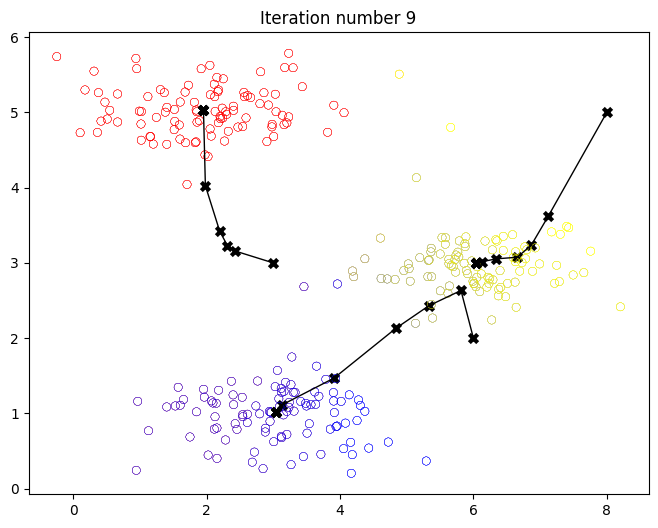

In [73]:

# Set initial centroids
initial_centroids = np.array([[3,3],[6,2],[8,5]])

# Number of iterations
max_iters = 10

# Run K-Means
centroids, idx = kMeans(X, initial_centroids, max_iters, plot_progress=True)

## 3 - Random initialization

In practice, a good strategy for initializing the centroids is to select random examples from the
training set.

* The code first randomly shuffles the indices of the examples (using `np.random.permutation()`). 
* Then, it selects the first $K$ examples based on the random permutation of the indices. 
* This allows the examples to be selected at random without the risk of selecting the same example twice.


In [74]:
def centroids_init(X, K):
    
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])
    
    # Take the first K examples as centroids
    centroids = X[randidx[:K]]
    
    return centroids

### Note      
In order to observe how different clusters are created based on the initial points chosen, W need to run K-Means several times, but this time with random initial centroids. 

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


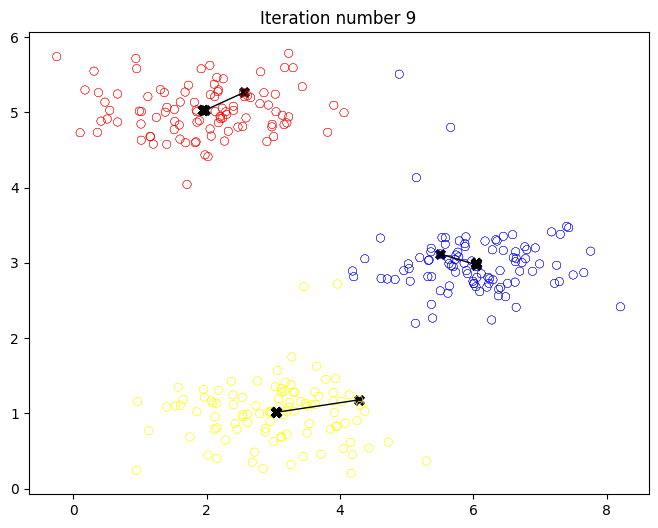

In [76]:
# Set number of centroids and max number of iterations
K = 3
max_iters = 10

# Set initial centroids by picking random examples from the dataset
initial_centroids = centroids_init(X, K)

# Run K-Means
centroids, idx = kMeans(X, initial_centroids, max_iters, plot_progress=True)

<a name="4"></a>
## 4 - Image compression with K-means

In this section, we will apply K-means to a real world task : image compression. 

* In a straightforward 24-bit color representation of an image$^{2}$, each pixel is represented as three 8-bit unsigned integers (ranging from 0 to 255) that specify the red, green and blue intensity values. This encoding is often refered to as the RGB encoding.
* Our image contains thousands of colors, and in this part of the exercise, you will reduce the number of
colors to 16 colors.
* By making this reduction, it is possible to represent (compress) the photo in an efficient way. 
* Specifically, we only need to store the RGB values of the 16 selected colors, and for each pixel in the image you now need to only store the index of the color at that location (where only 4 bits are necessary to represent 16 possibilities).

In this part, we'll use the K-means algorithm to select the 16 colors that will be used to represent the compressed image.
* Concretely, we'll treat every pixel in the original image as a data example and use the K-means algorithm to find the 16 colors that best group (cluster) the pixels in the 3- dimensional RGB space.
* Once we have computed the cluster centroids on the image, you will then use the 16 colors to replace the pixels in the original image.

<img src="figure 2.png" width="500" height="500">


### 4.1 Dataset

**Load image**

First, we'll use `matplotlib` to read in the original image, as shown below.

In [101]:
# Load an image of a bird
original_img = plt.imread('bird_small.png')

**Visualize image**

You can visualize the image that was just loaded using the code below.

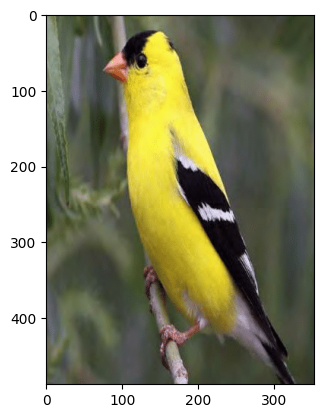

In [102]:
# Visualizing the image
plt.imshow(original_img)

**Checking the dimension of the variable**

As always, we'll print out the shape of our variable to get more familiar with the data.

In [103]:
print("Shape of original_img is:", original_img.shape)

Shape of original_img is: (488, 354, 4)


As we can see, this creates a three-dimensional matrix `original_img` where 
* the first two indices identify a pixel position, and
* the third index represents red, green, or blue. 

For example, `original_img[50, 33, 2]` gives the blue intensity of the pixel at row 50 and column 33.

#### Processing data

To call the `run_kMeans`, we need to first transform the matrix `original_img` into a two-dimensional matrix.

* The code below reshapes the matrix `original_img` to create an $m \times 3$ matrix of pixel colors (where
$m=16384 = 128\times128$)

In [104]:
# Divide by 255 so that all values are in the range 0 - 1 (not needed for PNG files)
# original_img = original_img / 255

# Reshape the image into an m x 3 matrix where m = number of pixels
# (in this case m = 128 x 128 = 16384)
# Each row will contain the Red, Green and Blue pixel values
# This gives us our dataset matrix X_img that we will use K-Means on.

X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))

ValueError: cannot reshape array of size 691008 into shape (172752,3)

<a name="4.2"></a>
### 4.2 K-Means on image pixels

Now, run the cell below to run K-Means on the pre-processed image.

In [82]:
# Run your K-Means algorithm on this data
# You should try different values of K and max_iters here
K = 16
max_iters = 10

# Using the function you have implemented above. 
initial_centroids = centroids_init(X_img, K)

# Run K-Means - this can take a couple of minutes depending on K and max_iters
centroids, idx = kMeans(X_img, initial_centroids, max_iters)

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


<Figure size 800x600 with 0 Axes>

In [83]:
print("Shape of idx:", idx.shape)
print("Closest centroid for the first five elements:", idx[:5])

Shape of idx: (16384,)
Closest centroid for the first five elements: [1 1 1 1 1]


The code below will plot all the colors found in the original image. As mentioned earlier, the color of each pixel is represented by RGB values so the plot should have 3 axes -- R, G, and B. We'll notice a lot of dots below representing thousands of colors in the original image. The red markers represent the centroids after running K-means. These will be the 16 colors that we'll use to compress the image.

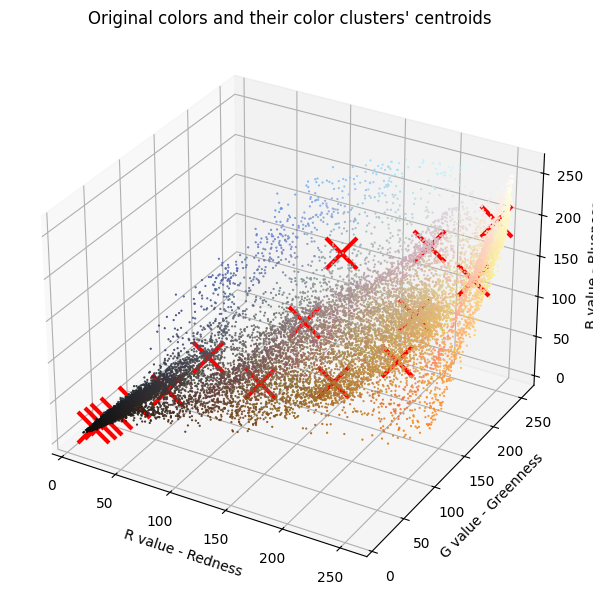

In [88]:
from mpl_toolkits.mplot3d import Axes3D
# Plot the colors of the image and mark the centroids
# Plot the colors and centroids in a 3D space
fig = plt.figure(figsize=(16, 16))
ax = fig.add_subplot(221, projection='3d')
ax.scatter(*X_img.T*255, zdir='z', depthshade=False, s=.3, c=X_img)
ax.scatter(*centroids.T*255, zdir='z', depthshade=False, s=500, c='red', marker='x', lw=3)
ax.set_xlabel('R value - Redness')
ax.set_ylabel('G value - Greenness')
ax.set_zlabel('B value - Blueness')
#ax.w_yaxis.set_pane_color((0., 0., 0., .2))
ax.set_title("Original colors and their color clusters' centroids")
plt.show()


We can visualize the colors at each of the red markers (the centroids) above with the function below. We will only see these colors when you generate the new image in the next section. The number below each color is its index and these are the numbers we see in the `idx` array.

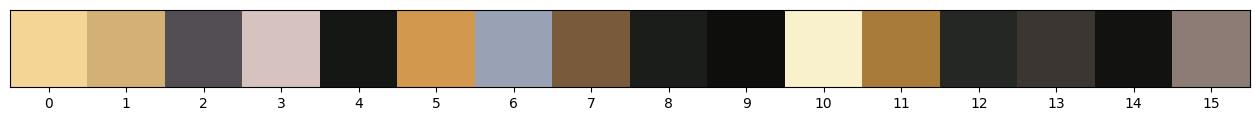

In [89]:
# Visualize the 16 colors selected
palette = np.expand_dims(centroids, axis=0)
num = np.arange(0,len(centroids))
plt.figure(figsize=(16, 16))
plt.xticks(num)
plt.yticks([])
plt.imshow(palette)


<a name="4.3"></a>
### 4.3 Compress the image


After finding the top $K=16$ colors to represent the image, we can now
assign each pixel position to its closest centroid using the
`find_closest_centroids` function. 
* This allows us to represent the original image using the centroid assignments of each pixel. 
* Notice that we have significantly reduced the number of bits that are required to describe the image. 
    * The original image required 24 bits (i.e. 8 bits x 3 channels in RGB encoding) for each one of the $128\times128$ pixel locations, resulting in total size of $128 \times 128 \times 24 = 393,216$ bits. 
    * The new representation requires some overhead storage in form of a dictionary of 16 colors, each of which require 24 bits, but the image itself then only requires 4 bits per pixel location. 
    * The final number of bits used is therefore $16 \times 24 + 128 \times 128 \times 4 = 65,920$ bits, which corresponds to compressing the original image by about a factor of 6.

In [90]:
# Find the closest centroid of each pixel
idx = closest_centroids(X_img, centroids)

# Replace each pixel with the color of the closest centroid
X_recovered = centroids[idx, :] 

# Reshape image into proper dimensions
X_recovered = np.reshape(X_recovered, original_img.shape) 

Finally, we can view the effects of the compression by reconstructing
the image based only on the centroid assignments. 
* Specifically, we replaced each pixel with the value of the centroid assigned to
it. 

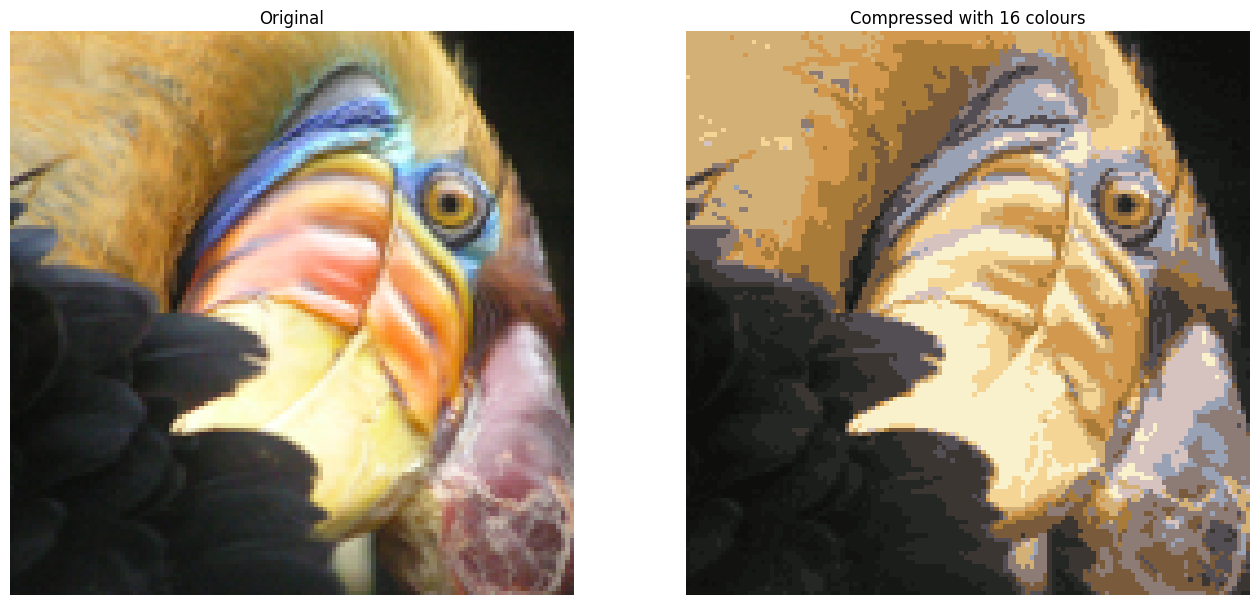

In [91]:
# Display original image
fig, ax = plt.subplots(1,2, figsize=(16,16))
plt.axis('off')

ax[0].imshow(original_img)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_recovered)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()